<a href="https://colab.research.google.com/github/luyuzhe111/machine-learning-foundamentals/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pickle
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
with open('hw3_p3.pkl', 'rb') as f:
    data = pickle.load(f)

In [8]:
x_train = data['x_train']

In [25]:
x_centered = x_train - np.expand_dims(x_train.mean(0), 0)

In [30]:
N = x_train.shape[1]
cov_mat = 1 / N * x_centered.T @ x_centered

In [32]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [42]:
sorted_ind = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_ind]
sorted_eigenvectors = eigen_vectors[:,sorted_ind]

In [88]:
norm_sorted_eigenvectors = sorted_eigenvectors / (sorted_eigenvectors ** 2).sum(0)

In [92]:
num_components = 10
selected_eigenvector = norm_sorted_eigenvectors[:,0:num_components]

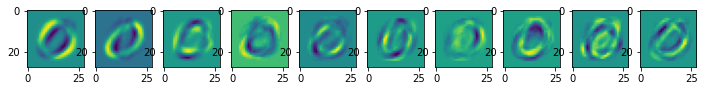

In [93]:
fig, ax = plt.subplots(1, num_components, figsize=(12, 24))
for i in range(num_components):
  ax[i].imshow(selected_eigenvector[:, i].reshape(28,28))
plt.show()

In [94]:
rand_img = x_train[0]

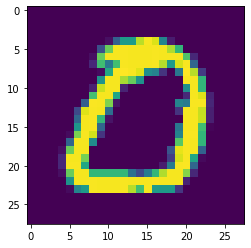

In [95]:
plt.imshow(rand_img.reshape(28,28))
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error

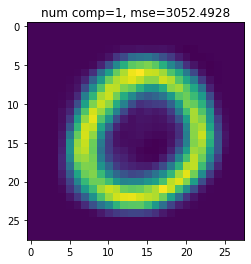

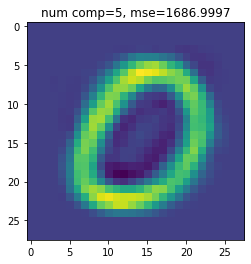

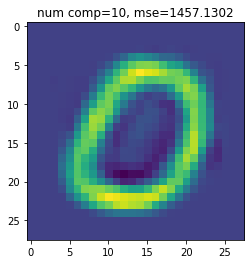

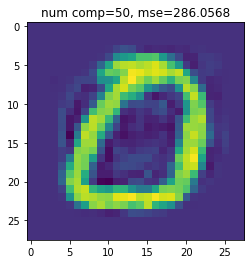

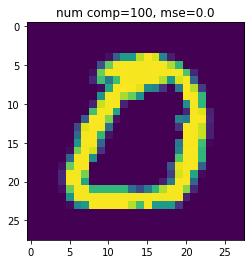

In [103]:
for k in [1, 5, 10, 50, 100]:
  reduced = (norm_sorted_eigenvectors[:, :k].T @ x_centered[0].T)
  rec = (np.dot(norm_sorted_eigenvectors[:, :k], reduced) + x_train.mean(0))
  mse = mean_squared_error(rand_img, rec)
  plt.imshow(rec.reshape(28, 28))
  plt.title(f'num comp={k}, mse={round(mse, 4)}')
  plt.show()